This project attempts to predict the final price of residential homes in Ames, Iowa.

In [364]:
import pandas as pd
import numpy as np

In [365]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [366]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [367]:
data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'], 
                  test.loc[:,'MSSubClass':'SaleCondition']))

**Data Preprocessing**

We need to create dummy variables for categorical features, and we will also need to figure out how to deal with NaN values. 

In [368]:
train_cats = train.select_dtypes(include='object')
train_nums = train.select_dtypes(include=['float64', 'int64'])
test_cats = test.select_dtypes(include='object')
test_nums = test.select_dtypes(include=['float64', 'int64'])
data_cats = data.select_dtypes(include='object')
data_nums = data.select_dtypes(include=['float64', 'int64'])

In [369]:
# create dummy variables for categorical features
data_cats = pd.get_dummies(data_cats)
train_cats = pd.get_dummies(train_cats)
test_cats = pd.get_dummies(test_cats)

In [370]:
# view NaN values in numericals
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
data_nums[data_nums.isna().any(axis=1)]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
7,60,NaN,10382,7,6,1973,1973,240.0,859.0,32.0,...,484.0,235,204,228,0,0,0,350,11,2009
12,20,NaN,12968,5,6,1962,1962,0.0,737.0,0.0,...,352.0,140,0,0,0,176,0,0,9,2008
14,20,NaN,10920,6,5,1960,1960,212.0,733.0,0.0,...,352.0,0,213,176,0,0,0,0,5,2008
16,20,NaN,11241,6,7,1970,1970,180.0,578.0,0.0,...,480.0,0,0,0,0,0,0,700,3,2010
24,20,NaN,8246,5,8,1968,2001,0.0,188.0,668.0,...,270.0,406,90,0,0,0,0,0,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,90,NaN,11836,5,5,1970,1970,0.0,149.0,0.0,...,928.0,0,0,0,0,0,0,0,3,2006
1449,180,21.0,1470,4,6,1970,1970,0.0,522.0,0.0,...,0.0,0,0,0,0,0,0,0,4,2006
1453,160,21.0,1526,4,5,1970,1970,0.0,0.0,0.0,...,0.0,0,34,0,0,0,0,0,6,2006
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006


In [371]:
data_cats[data_cats.isna().any(axis=1)]

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial


Most NaN values are coming from the LotFrontage and GarageYrBlt variables. Lot frontage is the horizontal distance along the right-of-way line between opposite-side boundaries of the lot. For simplicity of the analysis, these columns will be dropped from the dataset. I also dropped MasVnrArea for this same reason.

In [372]:
data_nums.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)
train_nums.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)
test_nums.drop(columns=['LotFrontage', 'GarageYrBlt', 'MasVnrArea'], inplace=True)

In [373]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
data_nums[data_nums.isna().any(axis=1)]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
660,20,5940,4,7,1946,1950,NaN,NaN,NaN,NaN,896,0,0,896,NaN,NaN,1,0,2,1,4,0,1.0,280.0,0,0,0,0,0,0,0,4,2008
728,20,47007,5,7,1959,1996,0.0,0.0,0.0,0.0,3820,0,0,3820,NaN,NaN,3,1,5,1,11,2,2.0,624.0,0,372,0,0,0,0,0,7,2008
1116,70,9060,5,6,1923,1999,548.0,0.0,311.0,859.0,942,886,0,1828,0.0,0.0,2,0,3,1,6,0,NaN,NaN,174,0,212,0,0,0,0,3,2007


There are three entries with NaN values left so we can analyze them indidually. #660 looks like it doesn't have a basement so 0's would fill well here. #728 looks like it doesn't have a bathroom in the basement. #1116 probably doesn't have a garage. For the purposes of this analysis, NaN values are replaced with 0's. 

In [374]:
data_nums.fillna(0, inplace=True)
train_nums.fillna(0, inplace=True)
test_nums.fillna(0, inplace=True)

**Exploratory Data Analysis (EDA) and Feature Engineering**

Next, we will take a look at the variable distributions in the training dataset and transform the variables if they appear non-normal (skewed).

In [375]:
skewKurt_nums = pd.DataFrame({'skewness':data_nums.skew(), 'kurtosis':data_nums.kurtosis()})
skewed_nums = skewKurt_nums[(abs(skewKurt_nums['skewness']) > 3)&(abs(skewKurt_nums['kurtosis']) > 7)]
skewed_nums

,skewness,kurtosis
LotArea,12.829025,264.952310
BsmtFinSF2,4.148275,18.844397
LowQualFinSF,12.094977,174.932812
BsmtHalfBath,3.933616,14.861472
KitchenAbvGr,4.304467,19.777937
EnclosedPorch,4.005950,28.377909
3SsnPorch,11.381914,149.409834
ScreenPorch,3.948723,17.776704
PoolArea,16.907017,298.633144
MiscVal,21.958480,564.074582


We will try the power transformation on these variables to reduce positive skewness.

In [376]:
skewed_nums.transpose()

temp = data_nums[list(skewed_nums.index)].apply(lambda x: pow(x, 0.2))
temp

,LotArea,BsmtFinSF2,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,6.100583,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
1,6.258269,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,0.000000
2,6.459970,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
3,6.251737,0.0,0.0,0.0,1.0,3.068413,0.0,0.0,0.0,0.000000
4,6.773668,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
1454,4.543401,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
1455,4.523515,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
1456,7.247797,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.000000
1457,6.364267,0.0,0.0,1.0,1.0,0.000000,0.0,0.0,0.0,3.706975


In [377]:
pd.DataFrame({'skewness':temp.skew(), 'kurtosis':temp.kurtosis()})

,skewness,kurtosis
LotArea,0.496468,7.084414
BsmtFinSF2,2.487361,4.427899
LowQualFinSF,8.597474,73.131548
BsmtHalfBath,3.712773,11.804813
KitchenAbvGr,-10.042422,261.871564
EnclosedPorch,1.955716,1.949691
3SsnPorch,8.833284,76.717212
ScreenPorch,2.950092,6.788010
PoolArea,15.044931,225.815738
MiscVal,5.476672,30.295295


We were able to get the kurtosis for some of the variables under control. For simplicity, we'll only keep the variables where kurtosis and skewness are within -7 and 7 and -3 and 3, respectively. 

In [378]:
data_nums['root_LotArea'] = pow(data_nums['LotArea'], 0.2)
data_nums['root_BsmtFinSF2'] = pow(data_nums['BsmtFinSF2'], 0.2)
data_nums['root_EnclosedPorch'] = pow(data_nums['EnclosedPorch'], 0.2)
data_nums['root_ScreenPorch'] = pow(data_nums['ScreenPorch'], 0.2)

train_nums['root_LotArea'] = pow(train_nums['LotArea'], 0.2)
train_nums['root_BsmtFinSF2'] = pow(train_nums['BsmtFinSF2'], 0.2)
train_nums['root_EnclosedPorch'] = pow(train_nums['EnclosedPorch'], 0.2)
train_nums['root_ScreenPorch'] = pow(train_nums['ScreenPorch'], 0.2)

test_nums['root_LotArea'] = pow(test_nums['LotArea'], 0.2)
test_nums['root_BsmtFinSF2'] = pow(test_nums['BsmtFinSF2'], 0.2)
test_nums['root_EnclosedPorch'] = pow(test_nums['EnclosedPorch'], 0.2)
test_nums['root_ScreenPorch'] = pow(test_nums['ScreenPorch'], 0.2)

In [379]:
data_nums.drop(columns=temp.columns, inplace=True)
train_nums.drop(columns=temp.columns, inplace=True)
test_nums.drop(columns=temp.columns, inplace=True)

For categorical variables, these we don't expect to be normal because they will come from some multinomial distribution. 

In [380]:
data_nums

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,root_LotArea,root_BsmtFinSF2,root_EnclosedPorch,root_ScreenPorch
0,60,7,5,2003,2003,706.0,150.0,856.0,856,854,1710,1.0,2,1,3,8,0,2.0,548.0,0,61,2,2008,6.100583,0.0,0.000000,0.0
1,20,6,8,1976,1976,978.0,284.0,1262.0,1262,0,1262,0.0,2,0,3,6,1,2.0,460.0,298,0,5,2007,6.258269,0.0,0.000000,0.0
2,60,7,5,2001,2002,486.0,434.0,920.0,920,866,1786,1.0,2,1,3,6,1,2.0,608.0,0,42,9,2008,6.459970,0.0,0.000000,0.0
3,70,7,5,1915,1970,216.0,540.0,756.0,961,756,1717,1.0,1,0,3,7,1,3.0,642.0,0,35,2,2006,6.251737,0.0,3.068413,0.0
4,60,8,5,2000,2000,655.0,490.0,1145.0,1145,1053,2198,1.0,2,1,4,9,1,3.0,836.0,192,84,12,2008,6.773668,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,7,1970,1970,0.0,546.0,546.0,546,546,1092,0.0,1,1,3,5,0,0.0,0.0,0,0,6,2006,4.543401,0.0,0.000000,0.0
1455,160,4,5,1970,1970,252.0,294.0,546.0,546,546,1092,0.0,1,1,3,6,0,1.0,286.0,0,24,4,2006,4.523515,0.0,0.000000,0.0
1456,20,5,7,1960,1996,1224.0,0.0,1224.0,1224,0,1224,1.0,1,0,4,7,1,2.0,576.0,474,0,9,2006,7.247797,0.0,0.000000,0.0
1457,85,5,5,1992,1992,337.0,575.0,912.0,970,0,970,0.0,1,0,3,6,0,0.0,0.0,80,32,7,2006,6.364267,0.0,0.000000,0.0


**Models**

Next, we will attempt to predict SalePrice based on other variables in the dataset. We'll start by trying a linear model, but we will explore ElasticNet regressions since there is a fair bit of multicollinearity. 

In [383]:
train_cats['Id'] = train_nums['Id']
test_cats['Id'] = test_nums['Id']

In [384]:
train = train_nums.merge(train_cats)
test = test_nums.merge(test_cats)

In [396]:
X_train = train.drop(columns=['Id', 'SalePrice'])
X_train_nums = X_train.select_dtypes(['float64', 'int64'])
X_train_cats = X_train.select_dtypes(['bool'])
X_test = test.drop(columns=['Id'])
X_test_nums = X_test.select_dtypes(['float64', 'int64'])
X_test_cats = X_test.select_dtypes(['bool'])
y_train = train.SalePrice

We'll conduct a chi-squared test to examine which features are most impactful. 

In [390]:
from sklearn.feature_selection import SelectKBest, chi2
pd.set_option('display.max_rows', 20)

best_features = SelectKBest(score_func=chi2, k=20)
fit = best_features.fit(X_train, y_train)
feature_scores = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(fit.scores_)], axis=1)
feature_scores.columns = ['specs', 'score']
print(feature_scores.nlargest(20, 'score'))

                    specs          score
9                2ndFlrSF  464884.065923
5              BsmtFinSF1  399985.063774
6               BsmtUnfSF  274751.154951
10              GrLivArea  196850.057866
7             TotalBsmtSF  174706.462874
19             WoodDeckSF  129833.849333
8                1stFlrSF  123809.831341
18             GarageArea   96184.054050
20            OpenPorchSF   74362.567373
0              MSSubClass   19281.232643
24        root_BsmtFinSF2    1709.797755
26       root_ScreenPorch    1672.560917
25     root_EnclosedPorch    1470.429196
147     Exterior2nd_Other    1459.000000
130   Exterior1st_ImStucc    1459.000000
94        Condition2_RRAn    1459.000000
164          ExterCond_Po    1459.000000
196         Heating_Floor    1459.000000
265          SaleType_Con    1458.000000
274  SaleCondition_Alloca    1366.888889


According to the chi-squared test, the following features are most important: 2ndFlrSF, BsmtFinSF1, BsmtUnfSF, GrLivArea, TotalBsmtSF, WoodDeckSF, 1stFlrSF, GarageArea, OpenPorchSF, and MSSubClass. Let's also examine the correlation between our variables. 

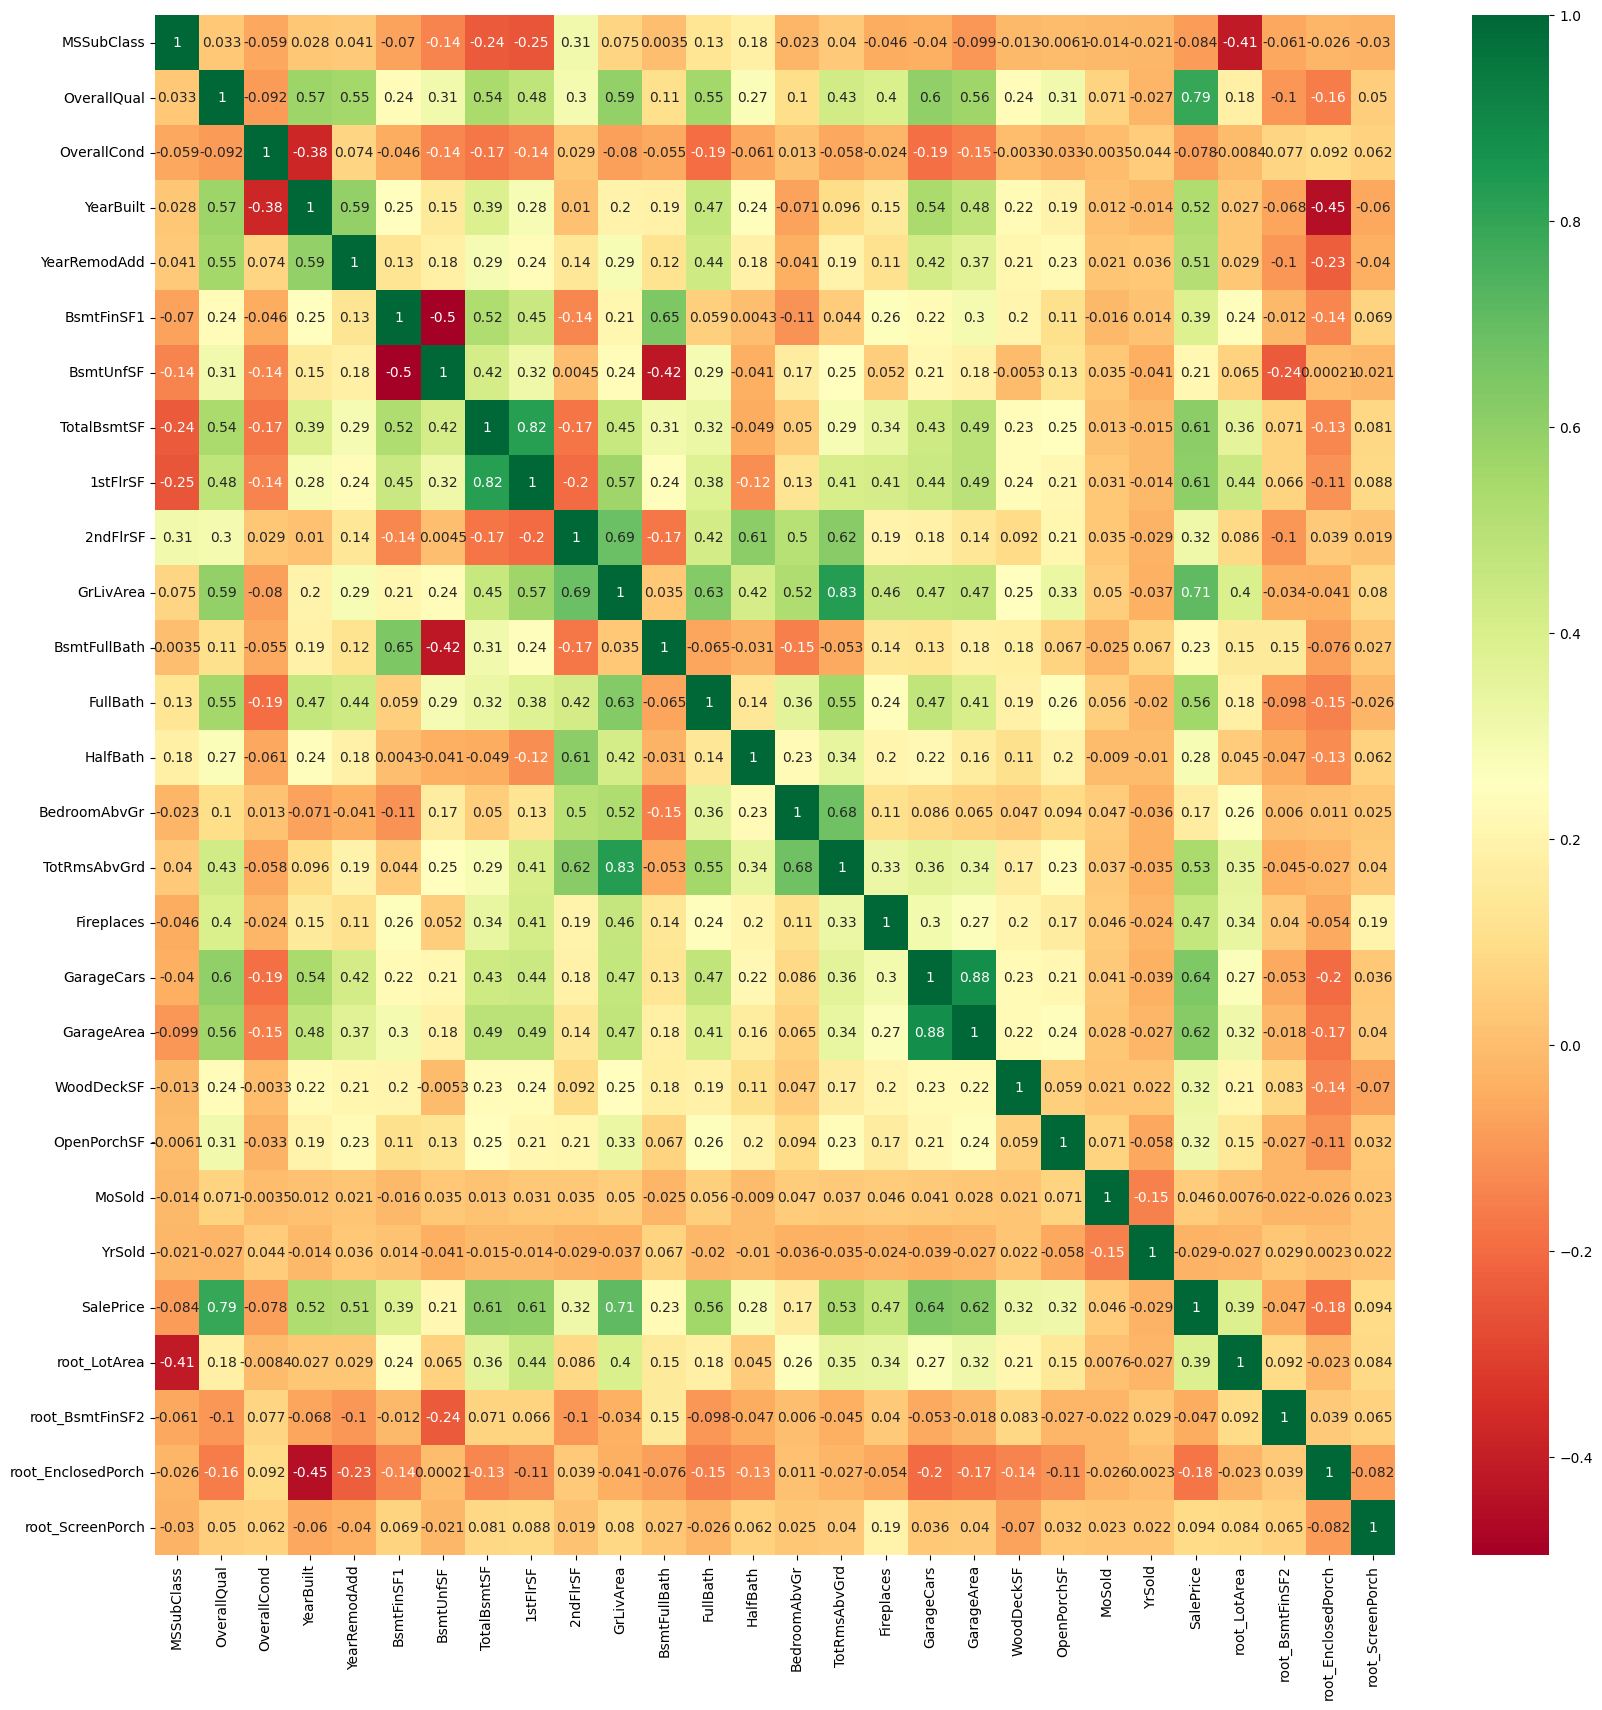

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt

d = train.drop(columns=['Id']).select_dtypes(['float64', 'int64'])
corrmat = d.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(d[top_corr_features].corr(), annot=True, cmap="RdYlGn")

There are a number of strong univariate predictors of SalePrice. Specifically, OverallQual and BsmtFullBath are >70% correlated with SalePrice. There is also multicollinearity between some of the variables. TotRmsAbvGrd is 83% correlated with GrLivArea. 

Given that we have a lot of variables, we will choose only the top 10 variables from our chi-squared analysis. Below, we will use a linear regression.

In [425]:
top_features = feature_scores.nlargest(10, 'score')
print(top_features)

X_train_2 = X_train[list(top_features['specs'])]
X_test_2 = X_test[list(top_features['specs'])]

          specs          score
9      2ndFlrSF  464884.065923
5    BsmtFinSF1  399985.063774
6     BsmtUnfSF  274751.154951
10    GrLivArea  196850.057866
7   TotalBsmtSF  174706.462874
19   WoodDeckSF  129833.849333
8      1stFlrSF  123809.831341
18   GarageArea   96184.054050
20  OpenPorchSF   74362.567373
0    MSSubClass   19281.232643


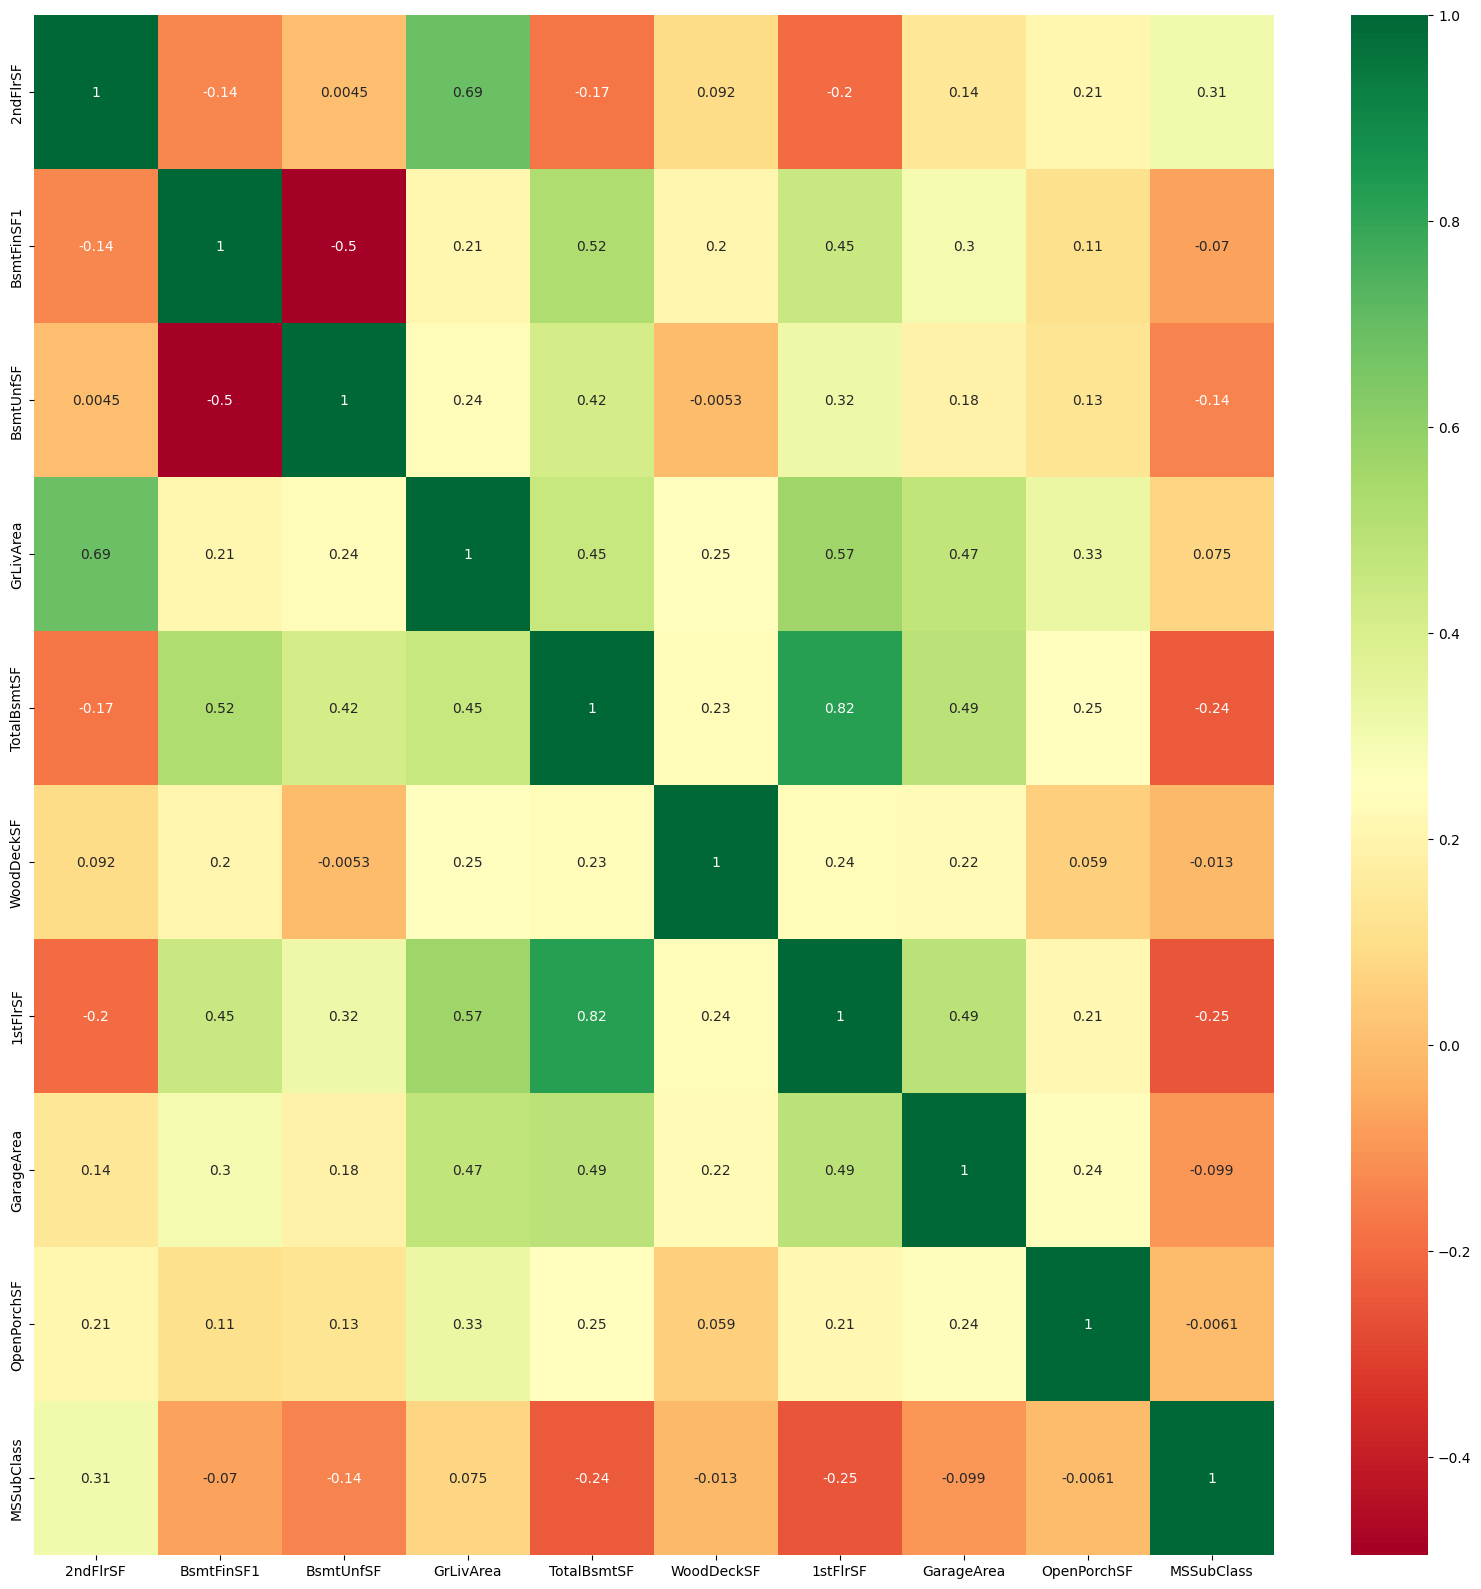

In [426]:
d2 = X_train_2.select_dtypes(['float64', 'int64'])
corrmat2 = d2.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(d2[corrmat2.index].corr(), annot=True, cmap="RdYlGn")

There still appears to be multicollinearity between a few variables, so we will remove GrLivArea and TotalBsmtSF to lessen this issue.

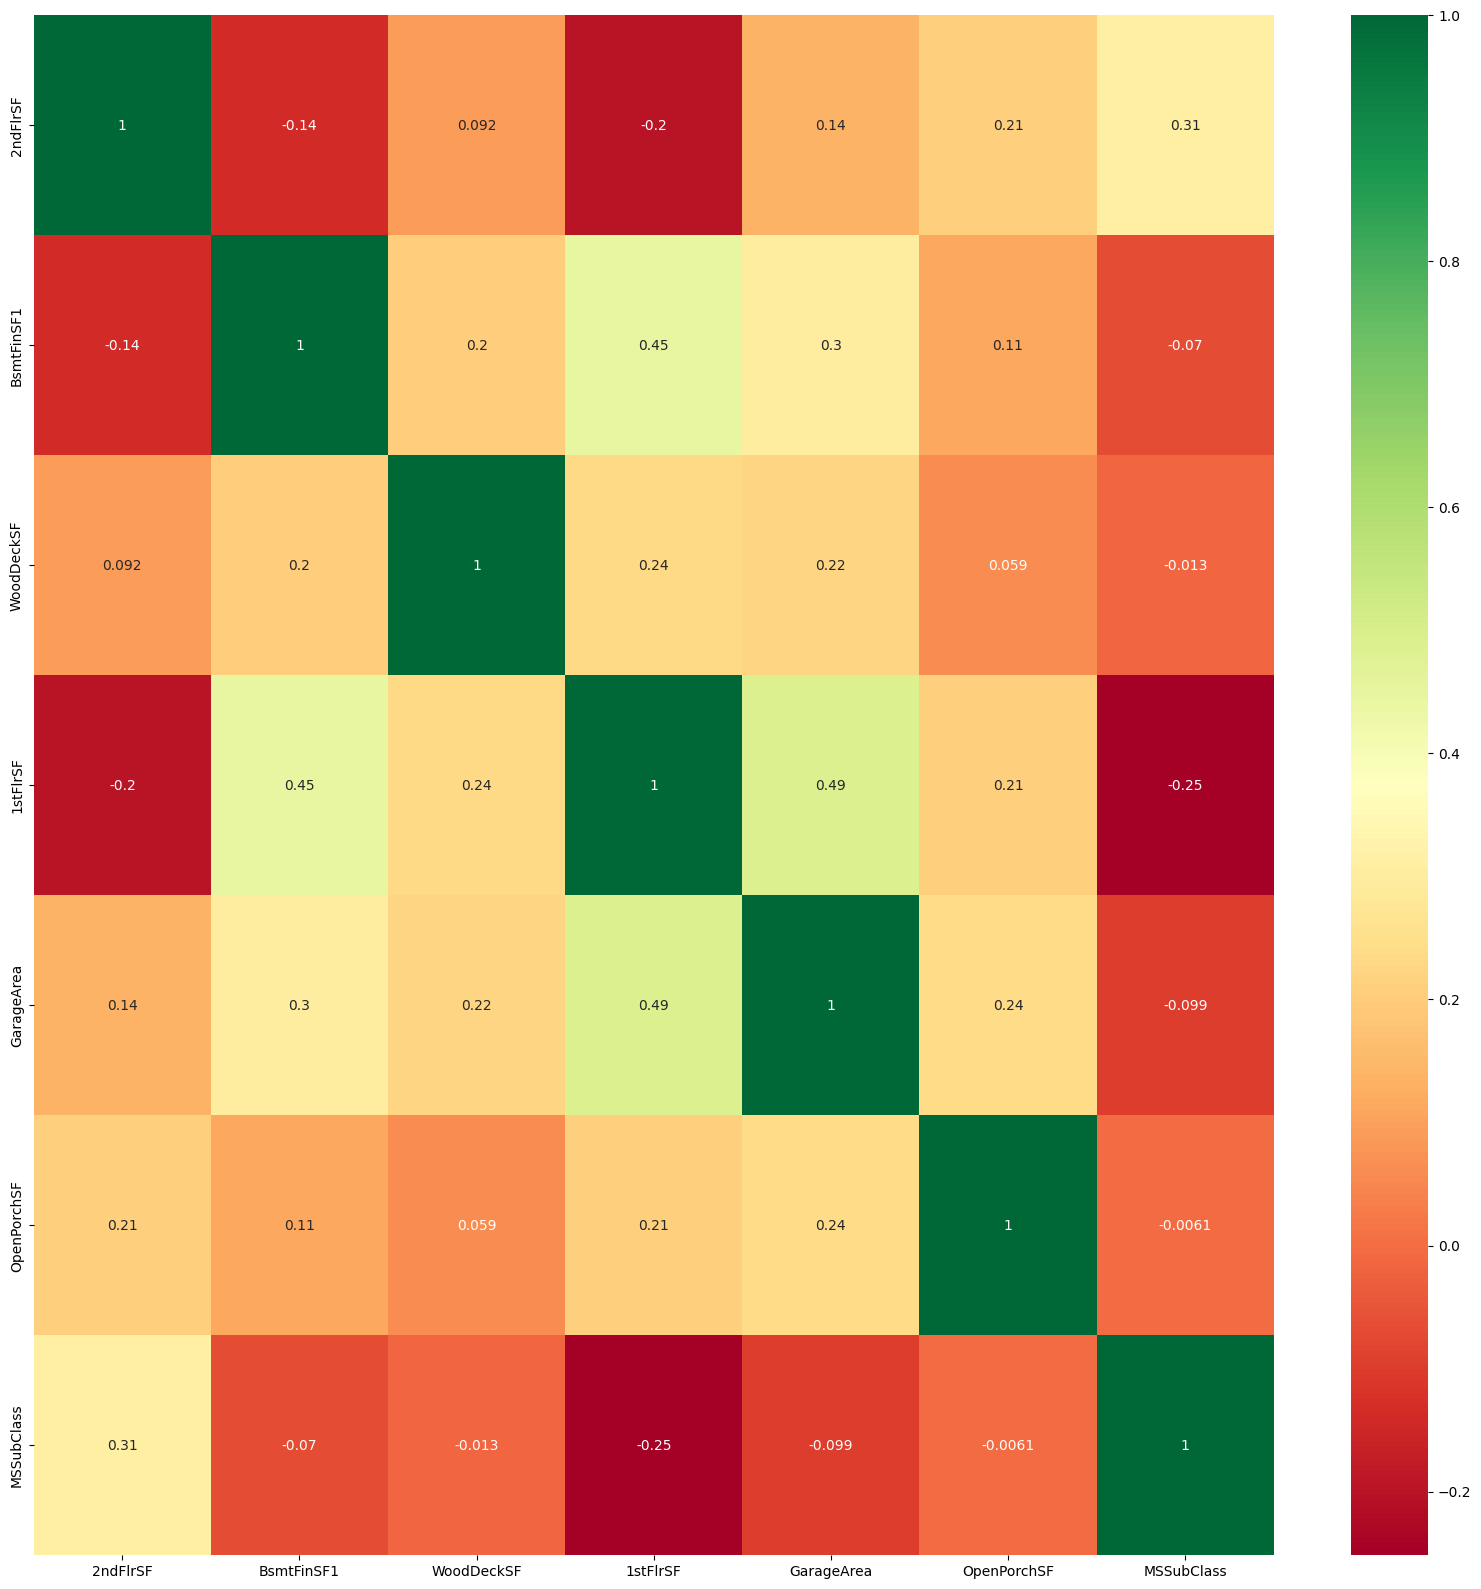

In [431]:
X_train_3 = X_train_2.drop(columns=['GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF'])
X_test_3 = X_test_2.drop(columns=['GrLivArea', 'TotalBsmtSF', 'BsmtUnfSF'])

d3 = X_train_3.select_dtypes(['float64', 'int64'])
corrmat3 = d3.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(d3[corrmat3.index].corr(), annot=True, cmap="RdYlGn")

In [469]:
from sklearn import linear_model as lm

lin_reg = lm.LinearRegression()
lr1 = lin_reg.fit(X_train_3, y_train)
print(lr1.coef_)
print(lr1.intercept_)

[  70.26011148   22.82140879   58.23263103   91.3804315   101.86268356
   65.79031421 -100.4893112 ]
-10843.707626217976


In [470]:
resids = y_train - lr1.predict(X_train_3)
sqs = y_train - np.mean(y_train)
squared_resids = pow(resids, 2)
sum_resids = sum(squared_resids)
sum_of_sqs = sum(sqs)
r2 = 1-sum_resids/sum_of_sqs
print(r2)

-2.9445203194538675e+20


This isn't that great -- let's see if we can add some variables.

In [471]:
lr2 = lin_reg.fit(X_train, y_train)
print(lr2.coef_)
print(lr2.intercept_)

[-2.42878221e+01  6.96336051e+03  6.13795142e+03  3.56121634e+02
  9.46058663e+01 -5.47611448e+00 -2.36936407e+01  4.54405292e+01
  4.80482439e+01  6.87190292e+01 -4.69545175e+00  9.97472134e+02
  3.41073795e+03  1.43890470e+03 -3.58180485e+03  1.21287645e+03
  6.12988867e+03  4.64182795e+03  1.47800012e+01  1.36054239e+01
 -8.12862445e-01 -4.80287900e+02 -6.96658562e+02  1.36355136e+04
 -6.61647105e+03  5.73528789e+02  2.15823196e+03 -2.35912567e+04
  1.33233904e+04  4.24394519e+03  3.58180144e+03  2.44211976e+03
 -1.28164009e+04  1.28164009e+04  2.27281886e+03  3.96379557e+03
 -4.05690305e+03 -2.59704390e+02  6.00389630e+03 -1.68728886e+03
  1.94037089e+00  6.96680318e+03 -1.17993617e+04  4.83061816e+03
  1.21836201e+04 -1.21836201e+04  4.76242340e+03  1.25307140e+04
 -3.55749932e+03 -1.73375818e+04  3.60194380e+03  3.70659992e+03
  1.14043197e+04 -1.51109196e+04  4.20016771e+03  1.87696570e+04
  9.67412596e+03 -1.29153121e+03 -1.50798117e+04 -9.16707218e+03
  1.38086237e+04 -1.87409

In [472]:
resids = y_train - lr2.predict(X_train)
sqs = y_train - np.mean(y_train)
squared_resids = pow(resids, 2)
sum_resids = sum(squared_resids)
sum_of_sqs = sum(sqs)
r2 = 1-sum_resids/sum_of_sqs
print(r2)

-6.051258965420534e+19


Finally, we will attempt to predict sales price using a linear model with the top three variables that are most related to sales price in the correlation matrix. 

In [473]:
X_train_4 = X_train[['1stFlrSF', 'YearBuilt', 'OpenPorchSF', 'root_LotArea', 'BsmtUnfSF', 'HalfBath', 'Fireplaces']]

lr3 = lin_reg.fit(X_train_4, y_train)
print(lr3.coef_)
print(lr3.intercept_)

resids = y_train - lr3.predict(X_train_4)
sqs = y_train - np.mean(y_train)
squared_resids = pow(resids, 2)
sum_resids = sum(squared_resids)
sum_of_sqs = sum(sqs)
r2 = 1-sum_resids/sum_of_sqs
print(r2)

[8.04994963e+01 8.35673665e+02 1.00604267e+02 1.60950913e+04
 4.18406522e+00 3.15997824e+04 1.95010684e+04]
-1691213.2738921097
-3.373823278673654e+20


In [480]:
predictions = pd.Series(lr3.predict(X_train_4))
pd.DataFrame({'SalePrice':predictions}).to_csv('predictions.csv')